# **Data Preprocessing**


## **Load the provided dataset and perform initial data exploration.**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

plt.style.use('seaborn')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15


<ipython-input-1-d1c0e06effad>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# Load xlsx file present in github repository using the raw url
df = pd.read_excel('https://raw.githubusercontent.com/hkv-code/ChurnForecast/main/customer_churn_large_dataset.xlsx')


In [3]:
# Dataset First Look
df.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
5,6,Customer_6,67,Male,New York,15,82.65,456,1
6,7,Customer_7,30,Female,Chicago,3,73.79,269,0
7,8,Customer_8,67,Female,Miami,1,97.70,396,1
8,9,Customer_9,20,Female,Miami,10,42.45,150,1
9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1


In [4]:
# Dataset Columns
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [5]:
# Dataset Rows & Columns count
df.shape

(100000, 9)

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [7]:
# Dataset Describe
df.describe(include = 'all')

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,100000,NaN,2,5,NaN,NaN,NaN,NaN
top,NaN,Customer_1,NaN,Female,Houston,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,50216,20157,NaN,NaN,NaN,NaN
mean,50000.500000,NaN,44.027020,NaN,NaN,12.490100,65.053197,274.393650,0.497790
std,28867.657797,NaN,15.280283,NaN,NaN,6.926461,20.230696,130.463063,0.499998
min,1.000000,NaN,18.000000,NaN,NaN,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,NaN,31.000000,NaN,NaN,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,NaN,44.000000,NaN,NaN,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,NaN,57.000000,NaN,NaN,19.000000,82.640000,387.000000,1.000000


In [8]:
# Finding out UNIQUE VALUES in the dataset
# Create a dictionary using dictionary comprehension having
# key = column name and values = unique values in that column
Unique_values_dict = {column_name: df[f'{column_name}'].unique() for column_name in df.columns}

# Print items in the dictionary
for key, value in Unique_values_dict.items():
  print(f'{key}: {value}\n') # using'\n' for readability

CustomerID: [     1      2      3 ...  99998  99999 100000]

Name: ['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000']

Age: [63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23]

Gender: ['Male' 'Female']

Location: ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']

Subscription_Length_Months: [17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21]

Monthly_Bill: [73.36 48.76 85.47 ... 75.21 41.98 83.55]

Total_Usage_GB: [236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 376 214 329  50 444 113  76 134 184 319 235  85 332  73
 369 308 446 321  83 114 296 102 215 169 225 140  84 463 402 468 375 366
 404 471 204 320 178 149 361 30

## **Handle missing data and outliers.**


In [9]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

print(f'{len(df[df.duplicated()])}' + ' duplicate values out of ' + f'{len(df)}')

0 duplicate values out of 100000


In [10]:
# Missing Values/Null Values Count
print(df.isnull().sum())

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


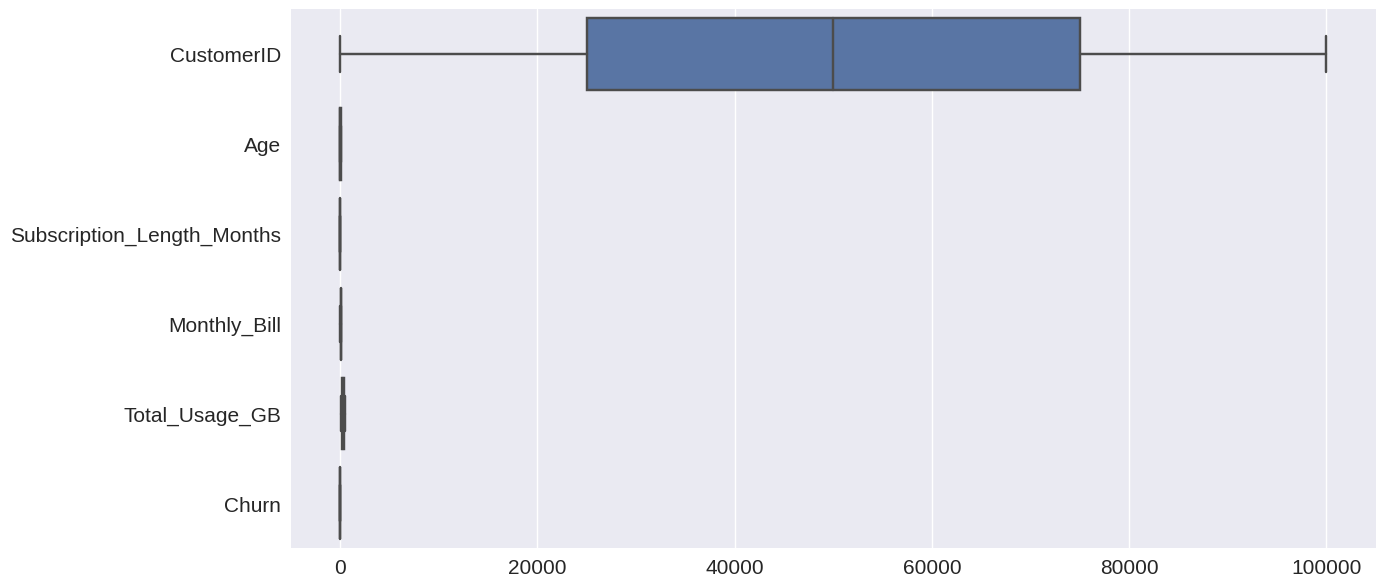

In [11]:
# Checking for Outliers
# Create a horizontal boxplot using Seaborn
plt.figure(figsize = (14,7))
sns.boxplot(data=df, orient = 'horizontal');

Based on above graph, there is no sign of outliers in any column


## **Prepare the data for machine learning by encoding categorical variables and splitting it into training and testing sets.**

Based on the initial inspection of the dataset, here's a brief description of each column with respect to churn:

1. **CustomerID**: A unique identifier for each customer. This column can be used to track individual customers but doesn't have much predictive power in terms of churn.

2. **Name**: The name or label for each customer. Like the CustomerID, this is more for identification purposes and likely doesn't correlate with churn.

3. **Age**: Age of the customer. Age could influence churn based on user preferences, technology adaptation rate, or other age-related factors.This could be binned into age groups (e.g., 18-30, 31-45, etc.) to create categorical variables

4. **Gender**: Gender of the customer (Male or Female). Gender might have some influence on churn if there are any gender-specific preferences or needs that the service doesn't cater to.

5. **Location**: The geographical location of the customer. Location can be significant if certain regions have better or worse service, or if there are regional competitors.

6. **Subscription_Length_Months**: How long (in months) the customer has been subscribed. A newer customer might be more or less likely to churn compared to someone who has been with the service for a long time.This can be binned into groups (e.g., < 6 months, 6-12 months, etc.

7. **Monthly_Bill**: The amount the customer pays monthly. Higher bills might make a customer more likely to consider alternatives and thus churn, while lower bills might indicate the opposite.

8. **Total_Usage_GB**: Total data usage of the customer in gigabytes. This could be indicative of how dependent or engaged a customer is with the service.

9. **Churn**: A binary variable indicating whether the customer churned (1) or not (0). This is the target variable we're often interested in predicting in churn analysis.

**From the above columns, "Gender" and "Location" are categorical variables that need to be encoded. "CustomerID" and "Name" are identifier columns that won't be useful for our machine learning model, so we'll exclude them from the analysis.**


In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Drop the 'CustomerID' and 'Name' columns
df = df.drop(columns=['CustomerID', 'Name'])



**Binning "Age" and "Subscription_Length" columns**


In [13]:
# Binning the 'Age' column
bins_age = [18, 35, 60, float('inf')]
labels_age = ['Young', 'Middle_Aged', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=False)

# Binning the 'Subscription_Length_Months' column
bins_subscription = [0, 3, 6, 12, float('inf')]
labels_subscription = ['0-3 Months', '3-6 Months', '6-12 Months', '>12 Months']
df['Subscription_Group'] = pd.cut(df['Subscription_Length_Months'], bins=bins_subscription, labels=labels_subscription, right=False)

In [14]:
# Display the transformed dataset
df.head(5)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Subscription_Group
0,63,Male,Los Angeles,17,73.36,236,0,Senior,>12 Months
1,62,Female,New York,1,48.76,172,0,Senior,0-3 Months
2,24,Female,Los Angeles,5,85.47,460,0,Young,3-6 Months
3,36,Female,Miami,3,97.94,297,1,Middle_Aged,3-6 Months
4,46,Female,Miami,19,58.14,266,0,Middle_Aged,>12 Months


**Encoding Categorical Variables: For binary categories, we can use label encoding. For columns with multiple categories, we'll use one-hot encoding.**

In [15]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply label encoding for binary categories and one-hot encoding for multi-categories
for col in categorical_cols:
    if df[col].nunique() == 2:  # binary category
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:  # multi-category
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
        df.drop(col, inplace=True, axis=1)

# Drop the 'Age' and 'Subscription_Length_Months' columns
df = df.drop(columns=['Age', 'Subscription_Length_Months'])

In [16]:
df.head()

,Gender,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Group_Young,Age_Group_Middle_Aged,Age_Group_Senior,Subscription_Group_0-3 Months,Subscription_Group_3-6 Months,Subscription_Group_6-12 Months,Subscription_Group_>12 Months
0,1,73.36,236,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,48.76,172,0,0,0,0,0,1,0,0,1,1,0,0,0
2,0,85.47,460,0,0,0,1,0,0,1,0,0,0,1,0,0
3,0,97.94,297,1,0,0,0,1,0,0,1,0,0,1,0,0
4,0,58.14,266,0,0,0,0,1,0,0,1,0,0,0,0,1


# **Feature Engineering**

**Feature Extraction: Creating "Usage_per_Dollar' feature**

In [17]:
# Create a new feature indicating usage per dollar
df['Usage_per_Dollar'] = df['Total_Usage_GB'] / df['Monthly_Bill']

In [18]:
# Display the transformed dataset
df.head(5)

,Gender,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Group_Young,Age_Group_Middle_Aged,Age_Group_Senior,Subscription_Group_0-3 Months,Subscription_Group_3-6 Months,Subscription_Group_6-12 Months,Subscription_Group_>12 Months,Usage_per_Dollar
0,1,73.36,236,0,0,0,1,0,0,0,0,1,0,0,0,1,3.217012
1,0,48.76,172,0,0,0,0,0,1,0,0,1,1,0,0,0,3.527482
2,0,85.47,460,0,0,0,1,0,0,1,0,0,0,1,0,0,5.382005
3,0,97.94,297,1,0,0,0,1,0,0,1,0,0,1,0,0,3.032469
4,0,58.14,266,0,0,0,0,1,0,0,1,0,0,0,0,1,4.575163


**Feature Scaling: Using Min-Max scaling to ensure all numerical features have values between 0 and 1.**


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale: numerical columns excluding the target variable 'Churn'
columns_to_scale = df.drop(columns=['Churn']).select_dtypes(include=['float64', 'int64']).columns.tolist()

# Applying Min-Max scaling
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [20]:
# Shifting the 'Churn' column to the most right column in the DataFrame

churn_column = df['Churn']  # Extract the 'Churn' column
df = df.drop('Churn', axis=1)  # Drop the 'Churn' column from the DataFrame
df['Churn'] = churn_column  # Add the 'Churn' column back at the end



In [21]:
# Display the transformed dataset
df.head(5)

,Gender,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Group_Young,Age_Group_Middle_Aged,Age_Group_Senior,Subscription_Group_0-3 Months,Subscription_Group_3-6 Months,Subscription_Group_6-12 Months,Subscription_Group_>12 Months,Usage_per_Dollar,Churn
0,1.0,0.619429,0.413333,0,0,1,0,0,0,0,1,0,0,0,1,0.168573,0
1,0.0,0.268000,0.271111,0,0,0,0,1,0,0,1,1,0,0,0,0.187837,0
2,0.0,0.792429,0.911111,0,0,1,0,0,1,0,0,0,1,0,0,0.302907,0
3,0.0,0.970571,0.548889,0,0,0,1,0,0,1,0,0,1,0,0,0.157123,1
4,0.0,0.402000,0.480000,0,0,0,1,0,0,1,0,0,0,0,1,0.252844,0


**Feature Selection: Using tree-based classifiers to determine feature importance. Specifically, using a Random Forest classifier, which is a popular tree-based method known for its robustness and ability to determine feature importance.**

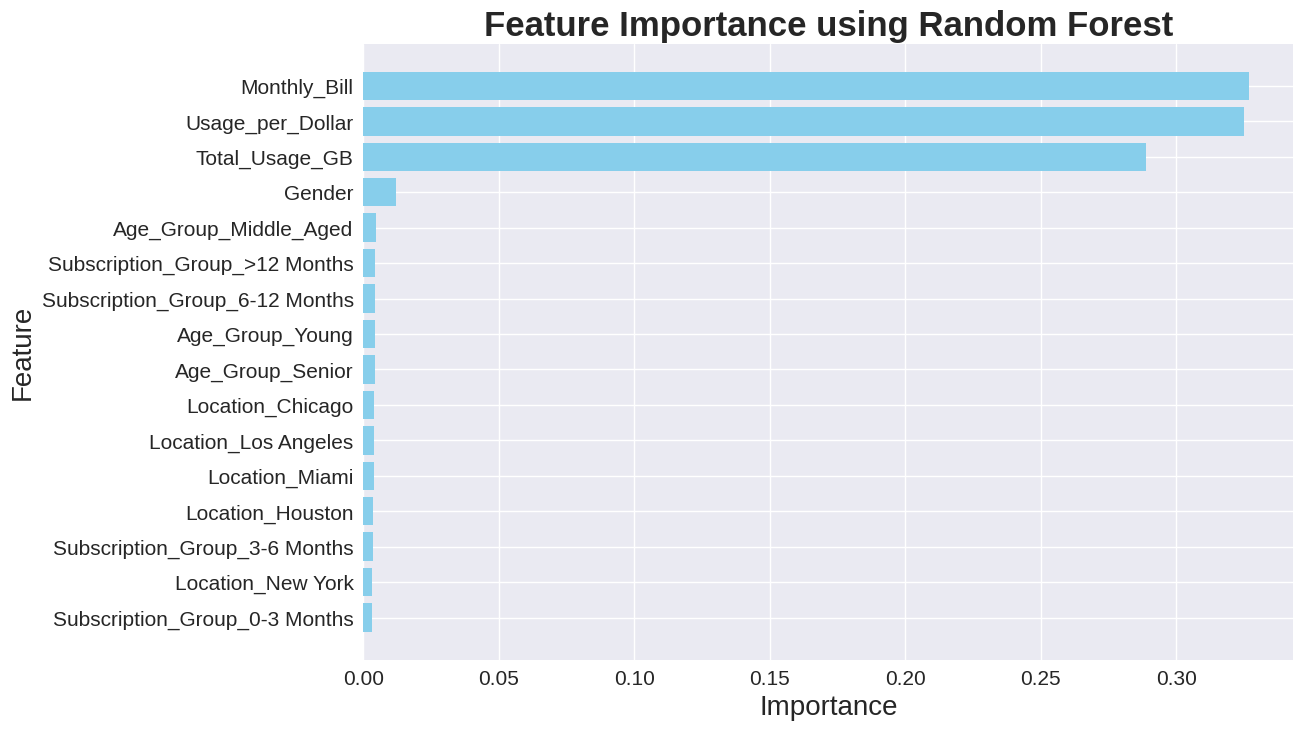

In [22]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Splitting the data into features (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Initializing the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model
rf.fit(X, y)

# Extracting feature importances
feature_importances = rf.feature_importances_

# Creating a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()
plt.show()


As shown clearly in the graph above,'Usage_per_Dollar is the most important feature in predicting churn. However, i'll be keeping all the features for the time being.

# **Model Building**

**Splitting the data into training and test sets.**


In [23]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((80000, 16), (20000, 16), (80000,), (20000,))

**Let's Train and evaluate the following classifiers:**
- Logistic Regression
- Decision Tree
- Random Forest (already done)
- Gradient Boosting (using XGBoost)
- A simple Neural Network (using Keras).

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Initialize the classifiers
logistic_reg = LogisticRegression(max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
xgboost_classifier = xgb.XGBClassifier(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and evaluate the classifiers
classifiers = [logistic_reg, decision_tree, xgboost_classifier,rf_classifier]
classifier_names = ['Logistic Regression', 'Decision Tree', 'XGBoost','Random Forest']
results = {}

for clf, name in zip(classifiers, classifier_names):
    # Train
    clf.fit(X_train, y_train)

    # Predict
    y_pred = clf.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = [accuracy, precision, recall, f1]

# Neural Network
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)

y_pred_nn = (model.predict(X_test) > 0.5).astype("int32").flatten()

accuracy = accuracy_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)
f1 = f1_score(y_test, y_pred_nn)

results['Neural Network'] = [accuracy, precision, recall, f1]

results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
results_df


625/625 [==============================] - 1s 1ms/step


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.50450,0.500722,0.384437,0.434941
Decision Tree,0.49755,0.493601,0.497631,0.495608
XGBoost,0.49255,0.487965,0.465880,0.476667
Random Forest,0.50145,0.497451,0.491684,0.494551
Neural Network,0.50465,0.501125,0.314283,0.386297


# **Model Optimization**

**Fine Tuning Logistic Regresssion Model**

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LogisticRegression model
logistic_reg = LogisticRegression(random_state=42)

# Define the hyperparameter grid for max_iter
param_grid = {'max_iter': [100, 500, 1000, 1500, 2000, 3000]}

# Create a GridSearchCV object
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='f1')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_max_iter = grid_search.best_params_['max_iter']
print("Best max_iter:", best_max_iter)

# Create a new LogisticRegression model with the best hyperparameters
best_logistic_reg = LogisticRegression(max_iter=best_max_iter, random_state=42)

# Fit the model to the training data
best_logistic_reg.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = best_logistic_reg.score(X_test, y_test)
precision = precision_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)
f1 = f1_score(y_test, y_pred_nn)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Best max_iter: 100
Test Accuracy: 0.5045
Precision: 0.5011250401800065
Recall: 0.3142828343916944
F1-Score: 0.38629746639410273


**Fine Tuning Neural Network**

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define a Function for Creating the Model
def create_model(hidden_units=16, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

# Create a KerasClassifier Wrapper
keras_classifier = KerasClassifier(build_fn=create_model, verbose=0)

# Define Hyperparameter Grid for GridSearch
param_grid = {
    'hidden_units': [16, 32],
    'learning_rate': [0.001, 0.01]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train, y_train)

# Print Best Parameters and Best Score
print("Best Parameters:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)

# Train the Best Model on the Entire Training Data
best_model = create_model(hidden_units=grid_result.best_params_['hidden_units'],
                          learning_rate=grid_result.best_params_['learning_rate'])
best_model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Evaluate on Validation or Test Data
y_pred = best_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy on Test Data:", accuracy)


<ipython-input-34-60bafddf0211>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=create_model, verbose=0)


Best Parameters: {'hidden_units': 16, 'learning_rate': 0.01}
Best Score: 0.5024749835332235
Epoch 1/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6935 - accuracy: 0.4970
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6933 - accuracy: 0.5038
Epoch 3/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.4986
Epoch 4/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.5002
Epoch 5/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.4997
Epoch 6/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 7/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.4995
Epoch 8/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6933 - accuracy: 0.4976
Epoch 9/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6933 - accurac

**Let's drop the location columns as it seems they are not influencing the "Churn"**


In [35]:
# List of column names that start with "Location"
location_columns = [col for col in X.columns if col.startswith("Location")]

# Drop the location_columns from the DataFrame
X_filtered = X.drop(columns=location_columns)

Create Training and Test data again

In [36]:
# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 11), (20000, 11), (80000,), (20000,))

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Logistic Regression
logreg_model = LogisticRegression(max_iter=100, random_state=42)
logreg_model.fit(X_train, y_train)
logreg_y_pred = logreg_model.predict(X_test)

# Evaluate models
models = ['Neural Network', 'Random Forest', 'Logistic Regression']
predictions = [nn_y_pred, rf_y_pred, logreg_y_pred]

for model_name, y_pred in zip(models, predictions):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print()


Results for Neural Network:
Accuracy: 0.4934
Precision: 0.4903
Recall: 0.5368
F1-Score: 0.5125

Results for Random Forest:
Accuracy: 0.5058
Precision: 0.5018
Recall: 0.4945
F1-Score: 0.4981

Results for Logistic Regression:
Accuracy: 0.5015
Precision: 0.4965
Recall: 0.3456
F1-Score: 0.4075



Here, neural network is giving the best f1 score, so let's pick this up and fine tune it.

In [39]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(16,), (32,), (16, 8), (32, 16)],
    'max_iter': [500, 1000, 1500],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create MLPClassifier
nn_model = MLPClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(nn_model, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_nn_model = grid_search.best_estimator_

# Predict using the best model
best_nn_y_pred = best_nn_model.predict(X_test)

# Evaluate the best model
best_accuracy = accuracy_score(y_test, best_nn_y_pred)
best_precision = precision_score(y_test, best_nn_y_pred)
best_recall = recall_score(y_test, best_nn_y_pred)
best_f1 = f1_score(y_test, best_nn_y_pred)

print("Results for Best Neural Network Model:")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Precision: {best_precision:.4f}")
print(f"Recall: {best_recall:.4f}")
print(f"F1-Score: {best_f1:.4f}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (32, 16), 'max_iter': 500}
Best Score: 0.5040125178139766
Results for Best Neural Network Model:
Accuracy: 0.4934
Precision: 0.4915
Recall: 0.6143
F1-Score: 0.5461


**Fine Tuned Neural Network model is giving highest 54.61% f1 score**


# **Model Deployment**

In [41]:
import joblib

# Save the model to disk
filename = 'best_nn_model.joblib'
joblib.dump(best_nn_model, filename)

# Optionally, to load it back later:
# loaded_model = joblib.load(filename)


['best_nn_model.joblib']

**1. Wrap the Model in a Web API with Flask**

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the model
model = joblib.load('best_nn_model.joblib')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([data['features']])
    return jsonify(prediction[0])

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


**2. Containerize the API with Docker**